<a href="https://colab.research.google.com/github/Shakorly/House_price_prediction/blob/main/Copy_of_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow


**Load the dataset**


Get to know your dataset is the first first in training the preparing the data for machine to learn





In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Let check the shape of the dataset
df.shape

(545, 13)


**Dataset Overview**

This dataset appears to contain information about houses, including their prices and various features that might influence the price. Here’s a breakdown of the columns:

price:

The target variable (dependent variable). This is the price of the house

area:

The area of the house, likely in square feet.

bedrooms:

The number of bedrooms in the house.

bathrooms:

The number of bathrooms in the house.

stories:

 The number of stories (floors) in the house.

mainroad:

 Whether the house is connected to the main road (yes or no).

guestroom:

Whether the house has a guest room (yes or no).

basement:

Whether the house has a basement (yes or no).

hotwaterheating:

Whether the house has a hot water heating system (yes or no).

airconditioning:

Whether the house has an air conditioning system (yes or no).

parking:

The number of parking spaces available.

prefarea:

Whether the house is located in a preferred area (yes or no).

furnishingstatus:

The furnishing status of the house (furnished, semi-furnished, or unfurnished).

Description Statistics

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



**price**


Mean: The average price of a house is 4,766,729.

Std: The prices vary significantly, with a standard deviation of 1,870,440, indicating a wide range of house prices.

Min: The cheapest house costs 1,750,000.

Max: The most expensive house costs 13,300,000.

25%: 25% of houses cost less than 3,430,000.

50%: The median price is 4,340,000, meaning half of the houses cost less than this.

75%: 75% of houses cost less than 5,740,000.

**
**: The price distribution is right-skewed (the mean > median), indicating that there are some very high-priced houses pulling the average up

**Data Visualization**

> Visualizing the data will help you better understand the distributions, relationships, and potential outliers.

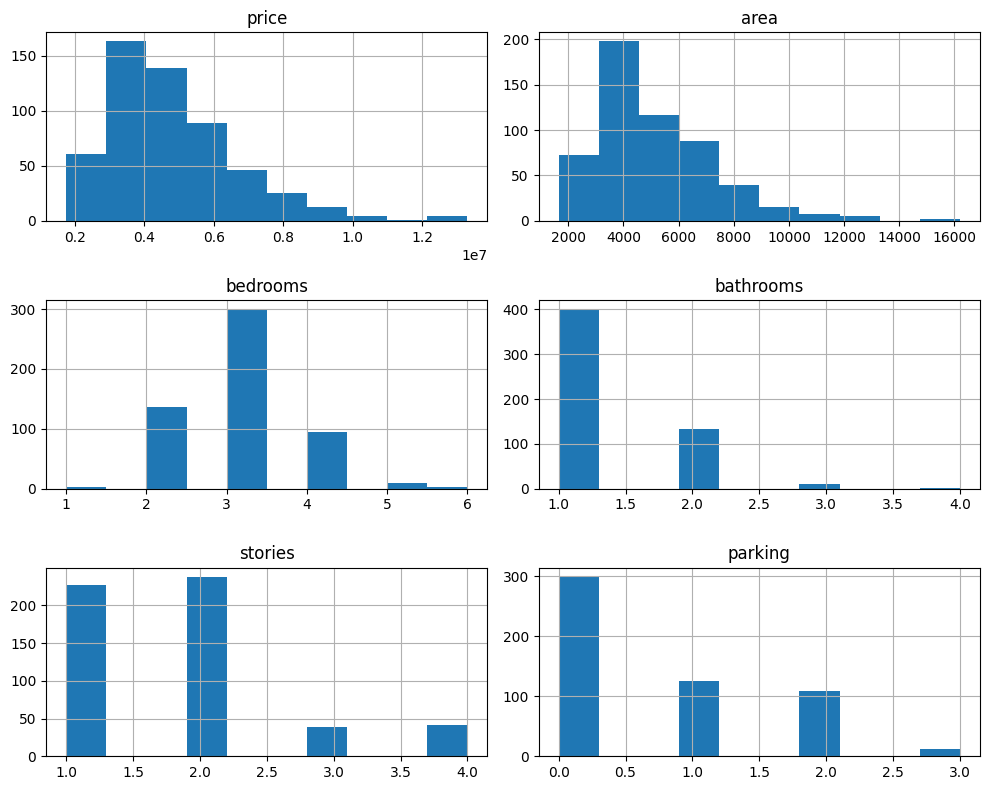

In [ ]:
# Plot histogram for numerical features

numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_features].hist( figsize=(10, 8))
plt.tight_layout()

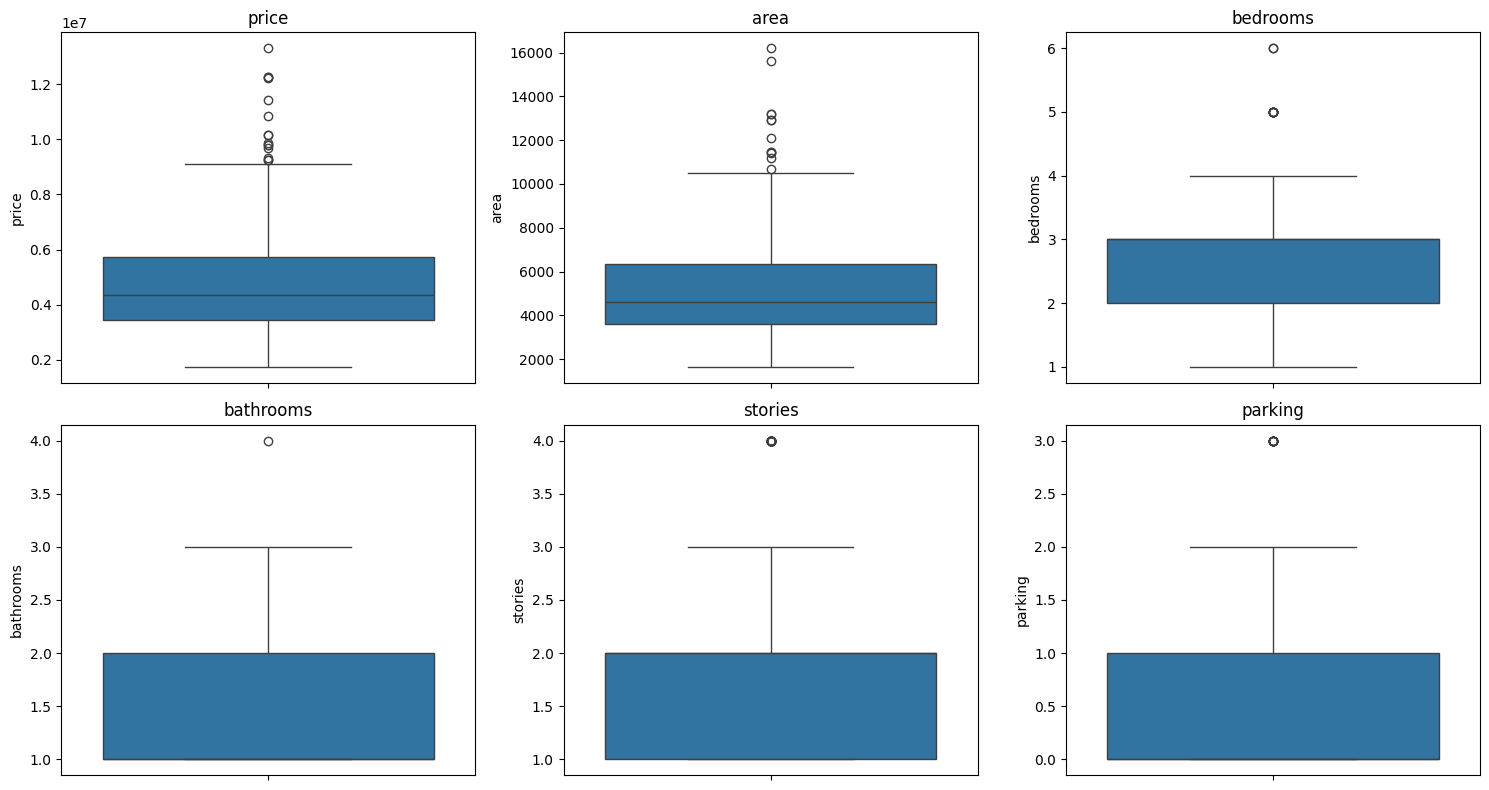

In [ ]:
# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

**Bar Plots for Categorical Features**

> Visualize the distribution of categorical features (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus).

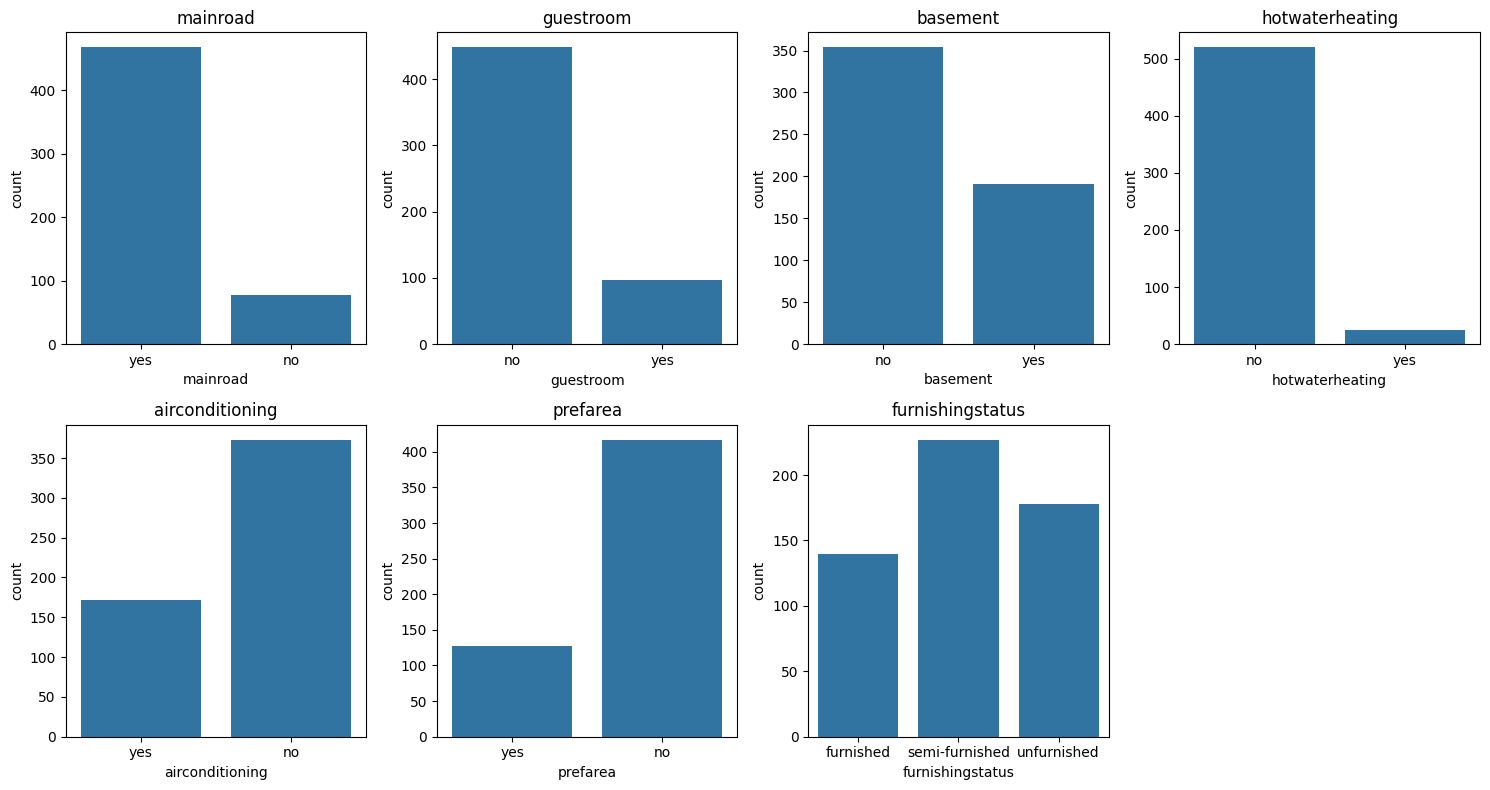

In [ ]:
# Categorical feature visualization
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# plot bar plots for the categories
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
   plt.subplot(2, 4, i)
   sns.countplot(x=df[feature])
   plt.title(feature)
plt.tight_layout()
plt.show()

**Correlation Analysis**

> Check how numerical features are correlated with each other and with the target variable (price).

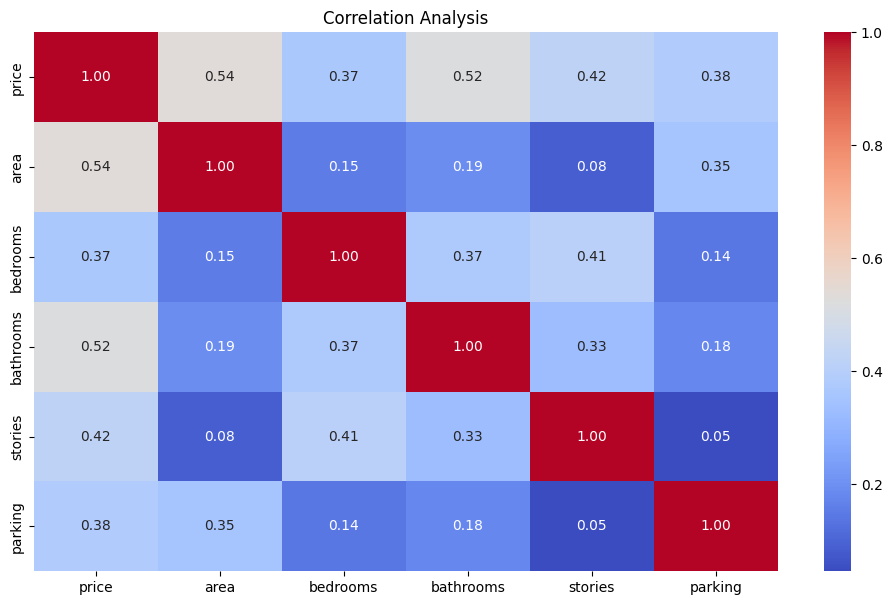

In [ ]:
# Check the correlation of the dataset

corr_matrix = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Analysis")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

class HousePricePrediction:
    def __init__(self, csv_path):
        """Initialize the house price prediction model."""
        # Load the data
        self.data = pd.read_csv(csv_path)

        # Basic data exploration and cleaning
        self.clean_data()

        # Separate features and target
        self.X = self.data.drop('price', axis=1)
        self.y = self.data['price']

        # Identify numeric and categorical columns
        self.numeric_features = self.X.select_dtypes(include=['int64', 'float64']).columns
        self.categorical_features = self.X.select_dtypes(include=['object']).columns

        # Create preprocessing pipeline
        self.preprocessor = self.create_preprocessor()

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Preprocess features once to determine input shape
        self.X_train_processed = self.preprocessor.fit_transform(self.X_train)
        self.X_test_processed = self.preprocessor.transform(self.X_test)
        self.input_dim = self.X_train_processed.shape[1]

        # Scale the target variable to help with training
        self.y_scaler = StandardScaler()
        self.y_train_scaled = self.y_scaler.fit_transform(self.y_train.values.reshape(-1, 1)).flatten()
        self.y_test_scaled = self.y_scaler.transform(self.y_test.values.reshape(-1, 1)).flatten()

        # Create and compile the model
        self.model = self.build_model()

    def clean_data(self):
        """Clean and prepare the dataset."""
        # Check for missing values
        if self.data.isnull().sum().any():
            self.data = self.data.dropna()

        # Check for duplicates
        self.data = self.data.drop_duplicates()

        # Convert categorical variables to strings to ensure proper encoding
        for col in self.data.select_dtypes(include=['object']).columns:
            self.data[col] = self.data[col].astype(str)

        # Log transformation of price (target) to handle skewness
        if 'price' in self.data.columns and (self.data['price'] <= 0).any():
            # Handle non-positive values if they exist
            min_price = self.data['price'].min()
            if min_price <= 0:
                self.data['price'] = self.data['price'] - min_price + 1

        # Log transform price
        self.data['price'] = np.log1p(self.data['price'])

        # Detect and handle outliers in numerical columns
        for col in self.data.select_dtypes(include=['int64', 'float64']).columns:
            if col != 'price':  # Don't remove price outliers
                q1 = self.data[col].quantile(0.01)
                q3 = self.data[col].quantile(0.99)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                self.data = self.data[(self.data[col] >= lower_bound) & (self.data[col] <= upper_bound)]

        print(f"Data shape after cleaning: {self.data.shape}")

    def create_preprocessor(self):
        """Create a preprocessing pipeline for features."""
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ])

        return preprocessor

    def build_model(self):
        """Build and compile the neural network model."""
        # Now we use the actual input dimension determined during preprocessing
        model = Sequential([
            Dense(64, activation='relu', input_dim=self.input_dim),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1)
        ])

        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae', 'mse']
        )

        return model

    def train(self, epochs=200, batch_size=32):
        """Train the model."""
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )

        # Train the model
        history = self.model.fit(
            self.X_train_processed, self.y_train_scaled,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluate the model
        self.evaluate()

        # Plot training history
        self.plot_training_history(history)

        return history

    def evaluate(self):
        """Evaluate the model on test data."""
        # Make predictions
        y_pred_scaled = self.model.predict(self.X_test_processed).flatten()

        # Inverse transform to get original scale
        y_pred = self.y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

        # Convert back from log scale
        y_pred = np.expm1(y_pred)
        y_true = np.expm1(self.y_test)

        # Calculate metrics
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        evaluation = {
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'R-squared': r2
        }

        print("Model Evaluation:")
        print(evaluation)

        return evaluation

    def predict(self, features):
        """Make predictions for new data."""
        # Ensure features is a DataFrame
        if not isinstance(features, pd.DataFrame):
            if isinstance(features, dict):
                features = pd.DataFrame([features])
            else:
                raise ValueError("Features must be a DataFrame or a dictionary")

        # Preprocess features
        features_processed = self.preprocessor.transform(features)

        # Predict
        predictions_scaled = self.model.predict(features_processed).flatten()

        # Inverse transform to original scale
        predictions = self.y_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

        # Convert back from log scale
        predictions = np.expm1(predictions)

        return predictions

    def plot_training_history(self, history):
        """Plot the training and validation loss curves."""
        plt.figure(figsize=(12, 4))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot MAE
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Model MAE')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Absolute Error')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def feature_importance(self, n_top=10):
        """Estimate feature importance using a random forest model."""
        from sklearn.ensemble import RandomForestRegressor

        # Train a random forest model for feature importance
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(self.X_train_processed, self.y_train)

        # Get feature names
        feature_names = []
        for name, transformer, cols in self.preprocessor.transformers_:
            if hasattr(transformer, 'get_feature_names_out'):
                feature_names.extend(transformer.get_feature_names_out(cols))
            else:
                feature_names.extend(cols)

        # Create importance DataFrame
        importance = pd.DataFrame({
            'Feature': feature_names[:len(rf.feature_importances_)],
            'Importance': rf.feature_importances_
        }).sort_values('Importance', ascending=False)

        # Plot top features
        plt.figure(figsize=(10, 6))
        plt.barh(importance['Feature'][:n_top], importance['Importance'][:n_top])
        plt.xlabel('Importance')
        plt.title(f'Top {n_top} Feature Importance')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

        return importance

    def __call__(self):
        """Train the model and return evaluation metrics when the object is called."""
        history = self.train()
        evaluation = self.evaluate()
        return evaluation


Data shape after cleaning: (545, 13)
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.9165 - mae: 0.7544 - mse: 0.9165 - val_loss: 0.7942 - val_mae: 0.6895 - val_mse: 0.7942
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6422 - mae: 0.6170 - mse: 0.6422 - val_loss: 0.5458 - val_mae: 0.5641 - val_mse: 0.5458
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5101 - mae: 0.5430 - mse: 0.5101 - val_loss: 0.4662 - val_mae: 0.5181 - val_mse: 0.4662
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4986 - mae: 0.5575 - mse: 0.4986 - val_loss: 0.4359 - val_mae: 0.4967 - val_mse: 0.4359
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5172 - mae: 0.5565 - mse: 0.5172 - val_loss: 0.4191 - val_mae: 0.4835 - val_mse: 0.4191
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4180 - mae: 0.4956 - mse: 0.4180 - val_loss: 0.4198 - val_mae: 0.4833 - val_mse: 0.4198
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4037 - mae: 0.4776 - mse: 0.4037 - val_loss: 0.4098 - va

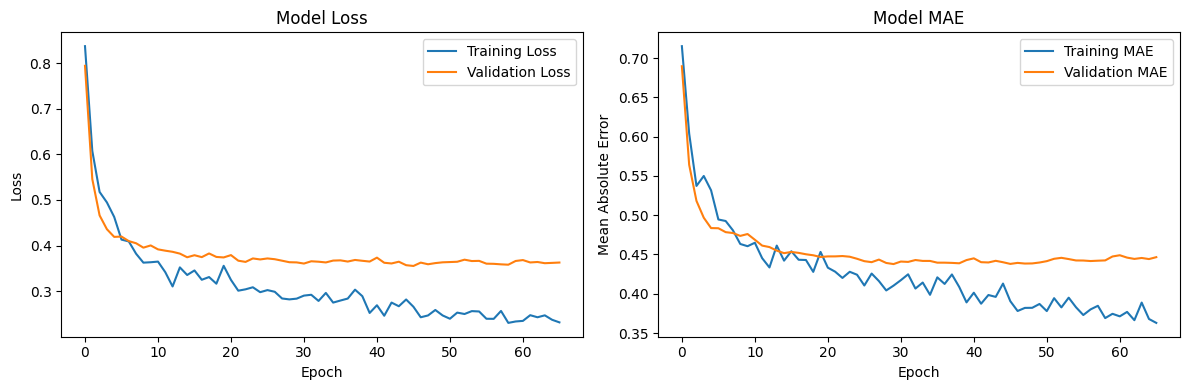

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Evaluation:
{'Mean Absolute Error': 998961.8394495412, 'Mean Squared Error': 2022223979572.3428, 'R-squared': 0.5999216785979513}
Final evaluation: {'Mean Absolute Error': 998961.8394495412, 'Mean Squared Error': 2022223979572.3428, 'R-squared': 0.5999216785979513}


In [ ]:

# Example usage
if __name__ == "__main__":
    model = HousePricePrediction("/content/Housing.csv")
    evaluation = model()
    print(f"Final evaluation: {evaluation}")

    # Optional: Predict house prices for new data
    # new_data = pd.DataFrame({...})  # Create a DataFrame with the same features as the training data
    # predictions = model.predict(new_data)